# Intro

We are Shahar(19) and Ron(18), computer science students nearing the end of our degrees. We are both passionate about chess and are interested in the world of data science, and so we decided to combine the two in this project -  building a chess engine and analyzing chess games and players.

# EDA

## Analysis of chess games

In this part, we will analyze a database of chess games from Kaggle. The database holds 6.2 million chess games, and has 15 fields, which are:

- Event: game type.

- White: white's ID.

- Black: black's ID.

- Result: game result (1-0 white wins, 0-1 black wins, 1/2-1/2 draw or abandoned)

- UTCDate: UTC date.

- UTCTime: time in UTC.

- White ELO: ELO rating of white.

- Black ELO: ELO rating of black.

- WhiteRatingDiff: white's rating points difference after the game.

- BlackRatingDiff: black's rating points difference after the game.

- ECO: the opening in ECO encoding.

- Opening: opening name.

- TimeControl: time of the game for each player in seconds. The number after the increment is the number of seconds before the player's cock starts ticking in each turn.

- Termination: reason for the game's end.

- AN: movements in Movetext format.

Before we dive into analyzing the data, first we must pre-process it. For accurate analysis we need to ensure that moves made by the players are as good as possible. As such, we'll only analyze games held in standard format, as other formats such as blitz or bullet give players less time to think about moves, and the probability for a mistake or a blunder is higher. After removing those games we are left with ~1.5 million standard chess games. We should also get rid of fields that give no important information about the games, such as the event type (as all games are now standard), the time &amp; date, the players' ID's, the rating differences for each player, and the time control (again, as all games are standard). After browsing the data, we noticed that some games have a result value of "abandoned", we decided to remove those games as there is no result value, so it will hurt our analysis.

In [1]:
df_1 = (lambda: _deepnote_execute_sql('SELECT *\nFROM \'filtered_games.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT *\nFROM \'filtered_games.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
df_1

,Result,White_ELO,Black_ELO,ECO,Opening,Termination,AN
0,1-0,1901,1896,D10,Slav Defense,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
1,0-1,1649,1638,C57,"Italian Game: Two Knights Defense, Traxler Cou...",Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Ng5 Bc5 5. N...
2,1-0,1630,1500,C41,Philidor Defense #3,Normal,1. e4 e5 2. Nf3 d6 3. Bc4 Nc6 4. d3 Na5 5. Na3...
3,0-1,1891,1930,C78,"Ruy Lopez: Morphy Defense, Arkhangelsk Variation",Time forfeit,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. O-...
4,0-1,1747,1731,C46,Three Knights Opening #2,Normal,1. e4 e5 2. Nf3 Nc6 3. Nc3 Bb4 4. a3 Ba5 5. b4...
...,...,...,...,...,...,...,...
1676441,0-1,1245,1868,C20,King's Pawn Game,Time forfeit,1. e4 e5 0-1
1676442,1-0,1229,1216,C44,Scotch Game,Time forfeit,1. e4 e5 2. Nf3 Nc6 3. d4 d6 4. d5 Nce7 5. Bc4...
1676443,1-0,1744,1337,A40,Modern Defense,Normal,1. d4 g6 2. b3 c6 3. Bb2 Bg7 4. Nf3 d6 5. e3 h...
1676444,1-0,1328,1292,C40,King's Knight Opening,Normal,1. e4 e5 2. Nf3 h6 3. Nc3 d6 4. Bc4 Qf6 5. Nd5...


First, we wanted to check if any side, black or white, has any inherent advantage, meaning whether one side wins more than the other. 

### Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Results in all games

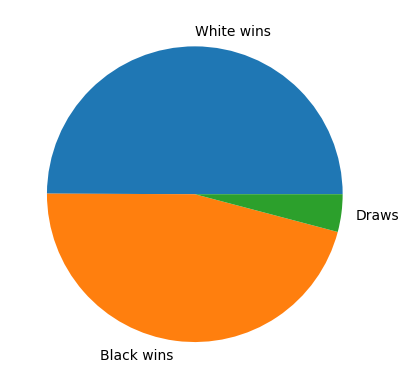

In [3]:
y = np.array([49.94, 45.95, 4.11])
mylabels = ["White wins", "Black wins", "Draws"]

plt.pie(y, labels = mylabels)
plt.show()

The results have shown that white indeed has an inherent advantage, albeit a marginal one. The white side won 49.94% of the matches, while the black side only won 45.95%, and the reminder, 4.11% of the games, were concluded as draws. This advantage is known as the first-move advantage in the chess world. We wanted to see if the same holds in high elo rated games.

### Results in high ELO games

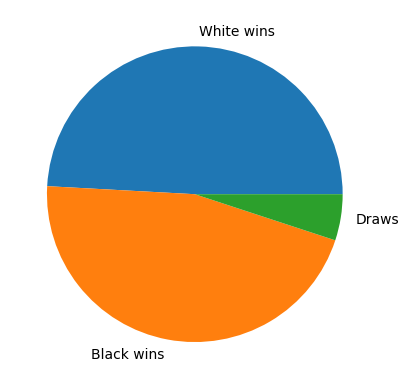

In [4]:
y = np.array([49.13, 45.81, 5.05])
mylabels = ["White wins", "Black wins", "Draws"]

plt.pie(y, labels = mylabels)
plt.show()

An interesting difference is that the amount of draws has gone up, by a whopping 1%. We can also see that the ratio between white wins and black wins went down, although marginally (from 1.09 to 1.07).

We took an additional step in our analysis and analyzed games of 12 different grandmasters, both from pre-computer era and from post-computer era:

### Results in grandmaster games

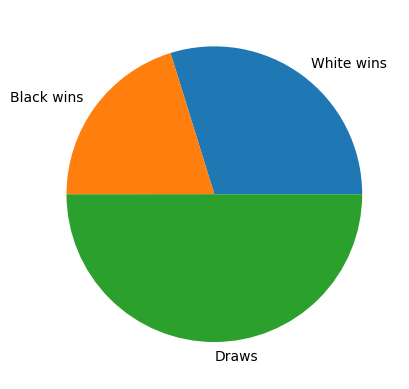

In [5]:
y = np.array([35.16, 23.87, 59])
mylabels = ["White wins", "Black wins", "Draws"]

plt.pie(y, labels = mylabels)
plt.show()

It can be seen that the ratio between white wins and black wins has drastically gone up to 1.47, which suggests that the first move advantage only becomes apparent at the highest level of games. Additionally, the trend in the increase of draws percentage continued and jumped drastically as well. 

### Analyzing chess openings

A useful way to encode opening types in chess is called ECO (Encyclopaedia of Chess Openings). The openings are divided into 5 types: flank openings (A), semi-open games (B), open games (C), closed games and semi-closed games (D) and indian defences (E). We wanted to see which opening type is the most popular in chess, and so we created the following graph which shows the top 20 most popular ECO code openings.

In [6]:
df=pd.read_csv('ECO_counts.csv')

filtered_df = df.head(20)

filtered_df = filtered_df.rename(columns={'mycount' : 'total times played'})

### ECO vs total times played in all games

In [7]:
(lambda: DeepnoteChart(filtered_df, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"total times played","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(filtered_df, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"total times played","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}"""))()

The most common opening is the irregular opening (A00), which is every opening that doesn't start with the moves e4, d4. Following it is the King's Pawn Game (C20) at second place, and the Philidor Defence (C41) at third.

As for opening types, the most popular opening type is the open category (C), which represents half of the most popular openings, which shows that the majority of players prefer open games. An interesting detail is that there are no openings of the indian defence category.

We wanted to see if the results will change when we look at higher ELO (rating) games. We calculated the average ELO rating for each match, and then calculated the average ELO rating for matches. The average is 1695.43. We chose to look at games with an average ELO rating higher than 1800. A rating of 1800 was chosen as it's higher from our average rating and it leaves us with enough games for a detailed analysis.

In [8]:
df2=pd.read_csv('POP_ECO_HIGH_ELO.csv')

filtered_df2 = df2.head(20)

filtered_df2 = filtered_df2.rename(columns={'mycount' : 'total times played'})

### ECO vs total times played in high ELO games

In [9]:
(lambda: DeepnoteChart(filtered_df2, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"total times played","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(filtered_df2, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"total times played","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}"""))()

The chart above shows us the top 20 most popular ECO code openings among high ELO players. Expectedly, while the irregular opening was the most common opening overall, among better players it isn't even in the top 20 as it is a bad opening that worsens white's position immediately. In fact, none of the top 20 most played ECO codes in our high ELO games overlap with the top 20 in the overall games, which is rather surprising, and probably means lower rated players have a very limited knowledge in openings. The top 3 most popular openings played by high rated players are the Sicilian Defence (B32), Sicilian, Alapin's variation (B22) and Giuoco Piano (C53). Overall, Sicilian Defence variations appear 5 times in the chart (25%: B32, B22, B90, B33, B45), showcasing how popular the opening is in high rated games.

There was also shift when it came to opening types. The most popular category among the high rated players is the semi-open games (B). Unlike the general population of players, an opening of the indian defence category is present, with E20, the Nimzo-Indian, and E61, the King's Indian.

Next, we wanted to check the white odds, the ratio between white wins and black wins and the black odds, the ratio between black wins and white wins, for each opening, for both all games and high ELO rated games, and comparing the results to the most common openings. To avoid repetition, we calculated only the white odds for each opening. To get the black odds, we simply need to invert the white odds.

The following 2 charts showcase the 20 most effective openings for white, and the 20 most effective openings for black across all games.

In [10]:
df3=pd.read_csv('WHITE_ODDS_DESC.csv')

filtered_df3 = df3.head(20)
filtered_df4 = df3.tail(20).sort_values(by=['white_odds'])
for i in filtered_df4.index:
    filtered_df4.at[i, 'white_odds'] = 1 / filtered_df4.at[i, 'white_odds']

filtered_df4 = filtered_df4.rename(columns={'white_odds' : 'black_odds'})

### ECO vs white odds in all games

In [11]:
(lambda: DeepnoteChart(filtered_df3, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"white_odds","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(filtered_df3, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"white_odds","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}"""))()

The chart above shows that the opening with the highest white odds value is the Queen's Gambit, Slav Accepted, Alapin (D16), with a white odds ratio of 2.18. At second place is a variation of the Queen's Pawn Game (D21) and at third place is a variation of the Dutch Defence opening (A82). 

The most effective opening type overall for white is the closed and semi-closed games (D).

### ECO vs black odds in all games

In [12]:
(lambda: DeepnoteChart(filtered_df4, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"black_odds","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(filtered_df4, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"black_odds","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}"""))()

As per the chart above, the most effective openings for the black side are Sicillian, Taimanov variation (B47), the Two Knights Defence (C59) and the Center Game opening (C22).

For high rated games, the most effective opening type for black is the open game category.

There are only 3 overlaps between the most common openings and the most effective openings for each side. The 1st is the King's Knight opening for white side (C40), with over 42,000 games played, and the Sicillian Defense opening for the black side (B20). The 2nd overlap is the most successful opening type for black is also the most popular type across the general populace of players, and the 3rd being that the indian defence opening type is absent in both the most popular openings and most successful openings for black. A reason for there being very little overlap between the two datasets is that common openings aren't necessarily the most effective.

In [13]:
df4=pd.read_csv('HIGH_ELO_WHITE_ODDS_DESCE.csv')

filtered_df5 = df4.head(20)
filtered_df6 = df4.tail(20).sort_values(by=['white_odds'])
for i in filtered_df6.index:
    filtered_df6.at[i, 'white_odds'] = 1 / filtered_df6.at[i, 'white_odds']

filtered_df6 = filtered_df6.rename(columns={'white_odds' : 'black_odds'})

The following 2 charts showcase the 20 most effective openings for white, and the 20 most effective openings for black in high ELO rated games.

### ECO vs white odds in high rated games

In [14]:
(lambda: DeepnoteChart(filtered_df5, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"white_odds","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(filtered_df5, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"white_odds","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}"""))()

According to the chart, the opening with the highest white odds value is the Queen's Gambit, Slav Accepted, Alapin (D16), with a white odds ratio of 2.5. Following it is a variation of the Dutch Defence opening (A82) at second place, and a variation of a Queen's Pawn Game (D21) at third. We can see that D16 was played 108 times overall, and 87 times in high rated games, so it being 1st overall is mainly because of the high rated games (although while 2.5 in high rated, it achieved "only" 2.18 overall, with 1.33 white odds for games below 1800 ELO). The most common opening in the chart, which had been played 5,521 times is the Queen's Gambit Accepted (D20) with 1.6 white odds.

The most effective opening type for white is yet again the semi-closed and closed games.

### ECO vs black odds in higher rated games

In [15]:
(lambda: DeepnoteChart(filtered_df6, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"black_odds","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(filtered_df6, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"black_odds","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}"""))()

The most effective openings for the black side are Sicillian, Taimanov variation (B47), the Two Knights Defence (C59) and the Vienna Gambit, Kaufmann variation (C29). Compared to the previous black odds chart, third-placed Center Game opening has dropped down to 11th place. The most common opening in the chart is yet again the Sicilian Defence (B20), showing its popularity and effectiveness among both high and low rated players.

As the same with white, the most effective opening type hasn't changed, and is still the open games category.

While the datasets for white &amp; black odds for all rated games had little overlap, for high rated ELO games there is no overlap between the 20 most common openings and the 20 most effective openings for each side. Having no overlap this time only strengthens our hypothesis that common openings don't necessarily achieve good results.

An interesting observation is the consistency of effectiveness of opening types across the white &amp; black side, with the semi-closed and closed games and open games, respectively, across the ratings ladder.

### Game length and its correlation with ELO

Chess games can vary in length a lot. Sometimes, an early blunder can finish the game immediately, and sometimes solid moves from both players can lead to a very long game, often resulting in a draw. We were curious to see how and whether the game length correlates with chess players' ELO.

We analyzed the games of all ELOs, the games of high ELOs (+1800) and the games of grandmasters and we reached the following results:

the average game length for all players is ~33 moves. For high rated games, however, the average game length is ~36 moves. Grandmaster games absolutely destroy those averages with an average of ~82 moves!. The median value is 30, 33 and ~80.5 respectively. It is clear that the stronger the players, the longer the games, and it isn't very surprising as stronger players make less blunders and play much better, so games don't end as quick as lower rated games tend to, where an early blunder can end the game on the spot.

Another interesting analysis we wanted to make is the average game length for each opening - seeing which openings usually lead to long games, and which openings usually lead to short games. We used the all ELOs database for it as it has the most data.

In [16]:
df7=pd.read_csv('len_per_eco.csv')
filtered_df5 = df7.head(20)
filtered_df6 = df7.tail(20).sort_values(by=['average'])

### ECO vs average game length (longest)

In [17]:
(lambda: DeepnoteChart(filtered_df5, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"average","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(filtered_df5, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"average","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}"""))()

### ECO vs average game length (shortest)

In [18]:
(lambda: DeepnoteChart(filtered_df6, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"average","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(filtered_df6, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"ECO","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"average","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}"""))()

As we can see, the opening that leads to the longest games is A90, also known as the Dutch Defense. The opening that leads to the shortest games is C57, the Two Knights Defense. This opening is a well known trap that often traps lower rated players to grant material advantage to its user, but if it fails, the position of its user is weakened. Therefore, it is no surprise that this opening leads to short games. Overall, a total dominance of type C openings can be seen in the shortest game length chart - 18 out of the 20 shortest openings are of type C - the open game openings. It is no shock that open games lead to shorter games, as piece exchanges happen more frequently and the game is overall more attacking and flowing. The longest games chart, however, is a lot more diverse, and topped by the E (indian defences) and A (flank openings) type openings with 8, 6 appearances respectively. 

### Conclusions

We arrived to the conclusion that in chess, the white side has an inherent advantage and will win more games compared to the black side. 

According to the data, the best opening for white players is the Queen's Gambit, as both the declined and the accepted variations bring good results, with the declined variation being much more effective. However, it can only be used if the black side has played a specific move: d5. Alternatively, opening with the move d4 can be strong for white as it counters the most effective opening for black, the Sicilian Defense and its variations. The sicilian defense is not only effective but also popular among chess players of all ratings. While it can only be played if the white side has moved the pawn in front of the king , it is a popular move for white. 

In general, open games lead to much shorter games, while the flank openings and the indian defences lead to overall longer games.  additionally, we can see that as the players' level rises, so does the length of the game.

The most important conclusions that we gathered from our data is that prevalence doesn't equate to effectiveness in chess, and that prevalence of openings vary by rating.

## Clustering grandmasters by their openings

### Choosing the players

We  put a lot of thought into what kind of data we want to cluster and check for similarities. After some failed attempts and second thoughts, we have decided to cluster the openings of grandmasters from different eras and check for interesting similarities (or differences). We chose a total of 20 players - including the current top 10 players (modern players in the computer era) and some players from the pre-computer era such as Kasparov, Fischer and Mikhail Tal. To do that, we collected thousands of games of each grandmaster, and we divided them into their ECO codes in a list of 500 values (each value for each ECO code).

In [19]:
players_dict = {"Alekhine" : [0] * 500, "Anand" : [0] * 500, "Carlsen" : [0] * 500, "Caruana" : [0] * 500, "Fischer" : [0] * 500, 
                "Giri" : [0] * 500, "Karpov" : [0] * 500, "Kasparov" : [0] * 500, "Morphy" : [0] * 500, "Nakamura" : [0] * 500, 
                "Nepomniachtchi" : [0] * 500, "Spassky" : [0] * 500, "Tal" : [0] * 500, "Ding" : [0] * 500, "So" : [0] * 500,
                "Firouzja" : [0] * 500, "Aronian" : [0] * 500, "Grischuk" : [0] * 500, "Rapport" : [0] * 500, "Karjakin" : [0] * 500}
for player in players_dict:
    file_path = "games/" + player + ".pgn"
    f = open(file_path, "r", encoding = 'unicode_escape')
    for line in f:
        if "ECO" in line:
            eco_code = line[6:9]
            eco_pos = (ord(eco_code[0]) - ord('A')) * 100 + int(eco_code[1]) * 10 + int(eco_code[2])
            players_dict[player][eco_pos] += 1





Next, we normalized the values in the list, so each value represents the fraction of games played with its ECO code divided by the total amount of games played. This way, all the values in the list sum up to 1.

In [20]:
for player in players_dict:
    eco_lis = players_dict[player]
    total_games = sum(eco_lis)
    for i in range(0, len(eco_lis)):
        eco_lis[i] /= total_games



### Dimensionality reduction

As we have a vector of size 500, and we want to visualize the data, we need to reduce dimensions. In order to do that, we are using PCA (Principal Component Analysis) and we take its first 2 components so we can show the data in a 2 dimensional graph.

In [21]:
from sklearn.decomposition import PCA
import random

pca = PCA(n_components=1)
X = []
for player in players_dict:
    eco_array = np.array(players_dict[player]).reshape(-1, 1)
    clust_comp = pca.fit_transform(eco_array)[:2]
    X.append((clust_comp[0][0], clust_comp[1][0]))
shaped_x = np.array(X).reshape(-1,2)

### Clustering with K-Means

Finally, after we plotted all of the grandmasters in the graph, it's time to cluster them. We decided to use the K-Means clustering algorithm, and here are the results:

/tmp/ipykernel_78/1687969098.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


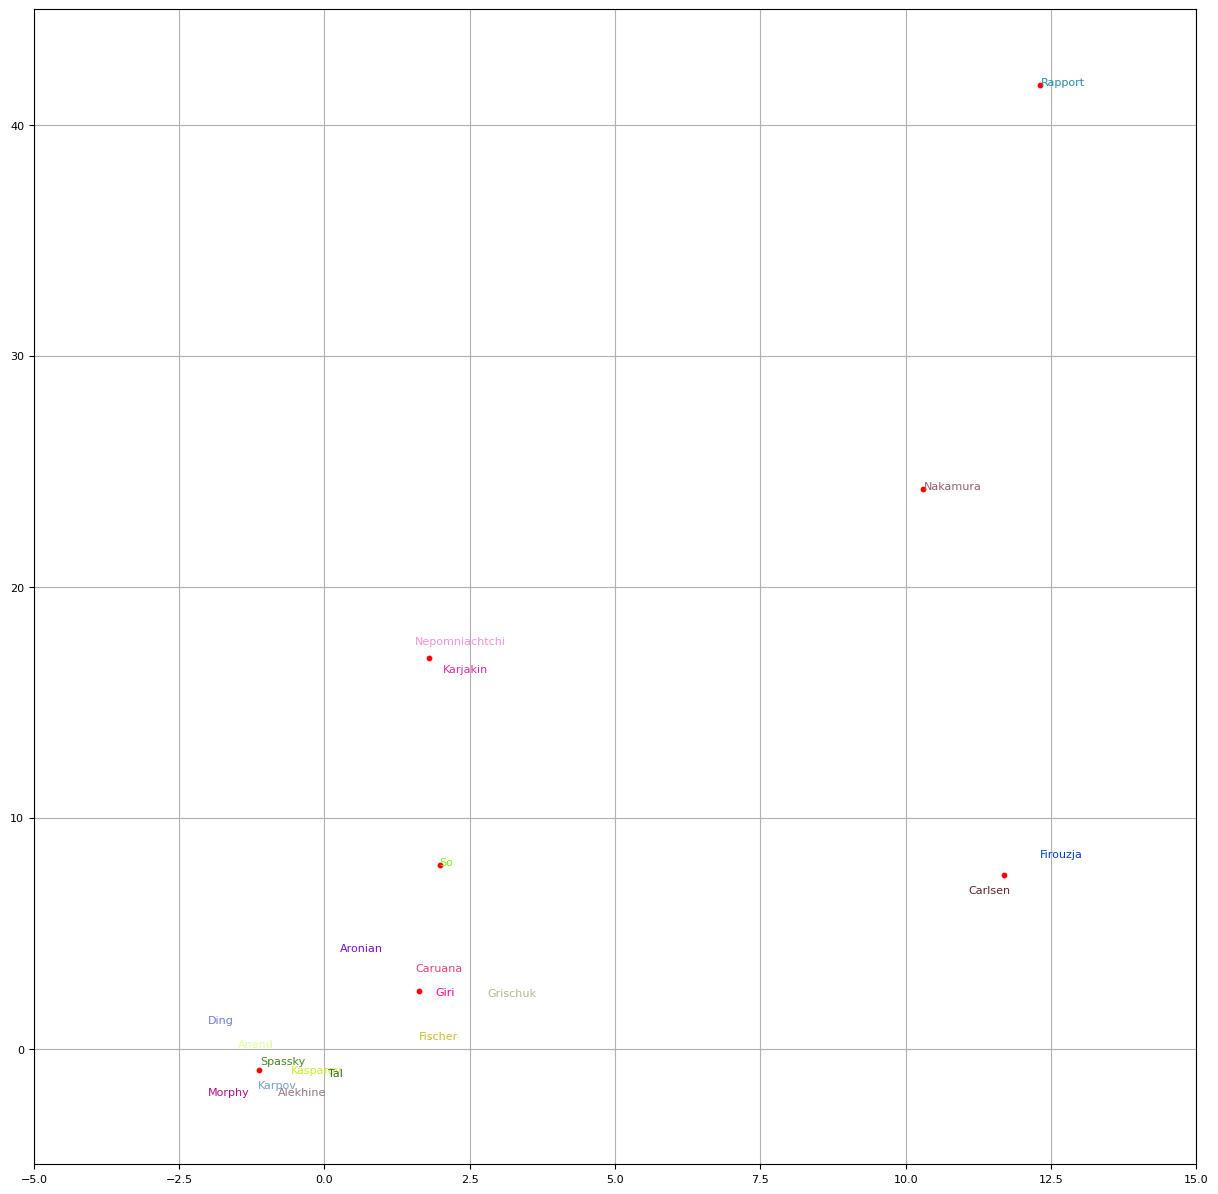

In [22]:
from sklearn.cluster import KMeans

plt.figure(figsize=(15, 15))
plt.rcParams.update({'font.size': 8})
kmeans = KMeans(init="k-means++", n_clusters=7, n_init=4)
pred_y = kmeans.fit_predict(shaped_x)
plt.scatter(kmeans.cluster_centers_[:, 0] * 1000, kmeans.cluster_centers_[:, 1] * 1000, s=10, c='red')

for player in players_dict:
    eco_array = np.array(players_dict[player]).reshape(-1, 1)
    clust_comp = pca.fit_transform(eco_array)[:2]
    rgb = (random.random(), random.random(), random.random())
    plt.annotate(player, (clust_comp[0]*1000, clust_comp[1]*1000), c=rgb)

plt.grid(b=None)
plt.xlim([-5, 15])
plt.ylim([-5, 45])
plt.show()

### Conclusions

We can see that our data can be divided into 7 different clusters. The first cluster (left to right) is the biggest one, and interestingly, it contains all of the pre-computer era grandmasters except Bobby Fischer. Another interesting point about this cluster, is that it contains one computer era player as well - Ding Liren. The data suggests that Ding plays his openings like an old school player, unlike his fellow computer era players. The second cluster is the 2nd biggest one, and it contains 4 computer era players and one pre-computer era player - Bobby Fischer. Fischer was known to be ahead of his time, so the data suggests that there is indeed some truth to that. The next 5 clusters are rather small and isolated. Wesley So can be seen alone in the middle of the graph, while the 2 pairs of Nepo, Karjakin and Carlsen, Firoujza are distant from everyone else. Magnus Carlsen is the strongest computer era player at the moment, and the player most similar to him is surprisingly the young prodigy Alireza Firouzja, only 18 years old. Perhaps this means Alireza will reach the heights of Magnus, or perhaps not, but still - this piece of data is quite fascinating. The next 2 clusters are by far the biggest anomalies. First is Hikaru Nakamura, 5 times US chess champion. It seems like Hikaru has a very unique opening style that is very different to all other chess grandmasters, and maybe that is one of the things that make him so entertaining to the viewers!   At last, we have Richard Rapport at the top right, all by himself and far away from anyone else.  According to Wikipedia, "Rapport often uses unusual openings even in official&nbsp;over-the-board&nbsp;tournaments.", and it definitely checks out with our data.

# The Engine

## Imports &amp; Initialization

We decided to use the python-chess api in our engine due to its flexibility and its helpful functions and GUI. This part contains all the imports needed to be able to play on a chess board and display it when needed.

In [23]:
!pip install chess
import chess
import chess.svg
import chess.polyglot
from IPython.display import display, Image


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 KB 26.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Categorizing The Game Into Phases

The game of chess is divided into 3 phases: opening, midgame and endgame. We decided to follow suit and divide the engine into thinking differently according to each phase.


### Opening

In chess, the opening refers to the initial moves of the game. Chess openings have been studied vastly and are quite absolute. There are dozens of different openings, and each one has dozens of variants. The opening decides the direction the game is going, but nonetheless it is the phase professional chess players spend the least time on since games are rarely decided by it. A move that is a part of the opening is called a "book move" and once players begin to deviate from the opening theory, they are said to be "out of book". Our engine uses a database of openings called an opening book. The book describes "lines", which are sequences of moves that give you a good position. The engine decides to play according to the book, and once it is out of the book, it will shift into the 2nd phase, the midgame. 

We chose to use an opening book because opening is an exact science, there is no need to calculate which position is best as it is already known. In addition, searching in an opening book is much more efficient than searching on our own using the evaluation function. 

The algorithm to chose a move in the opening phase works as follows: the engine receives the current board position, and fetches the possible moves from the opening book. Each move has a weight to it, indicating how popular the move is. The engine then takes the 3 best possible moves, and out of those 3, the move to make is picked in by a weighted random choice.

In [24]:
import random
def opening_move(board, reader):
    moves_list = []
    candidate_moves = []
    raffle = 0
    for entry in reader.find_all(board):
        if entry.move in board.legal_moves:
            moves_list.append((entry.move, entry.weight))
        if not moves_list:
            return None
    candidate_moves = moves_list[:min(len(moves_list),3)] 
    for cand in candidate_moves:
        raffle += cand[1]
    winner = random.randint(0, raffle)
    for cand in candidate_moves:
        if winner <= cand[1]:
            return cand[0]
        winner -= cand[1]


Here is an example of the engine playing the opening phase against itself:

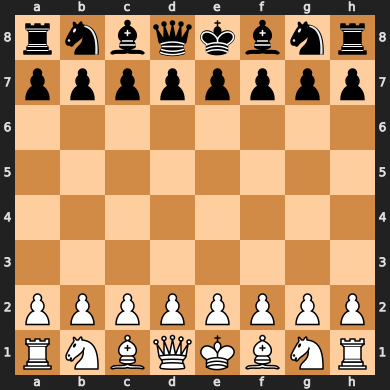

White has played: e2e4
Black has played: c7c5
White has played: b1c3
Black has played: b8c6
White has played: f1b5
Black has played: c6d4
White has played: b5c4
Black has played: e7e6
White has played: g1e2
Black has played: g8f6
White has played: e1g1
Black has played: a7a6
White has played: a2a4
Black has played: f6e4
White has played: c3e4
Black has played: d7d5


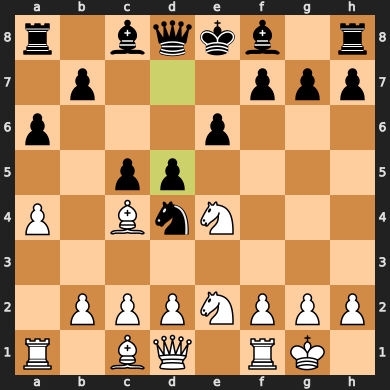

Game has moved on to the midgame.


In [25]:

board = chess.Board()
reader = chess.polyglot.open_reader("Titans.bin")
display(board)
while(True):
    move_to_make = opening_move(board, reader)
    if move_to_make is None:
        break
    if board.turn:
        print("White has played: " + move_to_make.uci())
    else:
        print("Black has played: " + move_to_make.uci())
    board.push(move_to_make)

display(board)
print("Game has moved on to the midgame.")

### Midgame

In the midgame, the engine searches for the best possible move using a negamax algorithm, a variant of the minimax algorithm which relies on the zero-sum property of chess. Instead of computing scores relative to each side, one side wants the score to be positive, while the other wants it to be negative.

There are 2 main ways to make a bot good in the midgame phase - giving it a good valuation heuristic and searching as little as possible useless moves that waste valuable time. One of the ways to do the former is using transposition tables - a hash table that keeps the positions we have searched so far and their valuation. This way, whenever we reach a position that was already searched and put into the transposition table (for example, if both sides moved their knight and then returned it to its previous location), we can take its valuation straight away from the table instead of searching and opening the move's node.

In [26]:
# this code was taken from the python-chess library.

import typing
from typing import List, Callable
ZOBRIST_RANDOM_ARRAY = [
    0x9D39247E33776D41, 0x2AF7398005AAA5C7, 0x44DB015024623547, 0x9C15F73E62A76AE2,
    0x75834465489C0C89, 0x3290AC3A203001BF, 0x0FBBAD1F61042279, 0xE83A908FF2FB60CA,
    0x0D7E765D58755C10, 0x1A083822CEAFE02D, 0x9605D5F0E25EC3B0, 0xD021FF5CD13A2ED5,
    0x40BDF15D4A672E32, 0x011355146FD56395, 0x5DB4832046F3D9E5, 0x239F8B2D7FF719CC,
    0x05D1A1AE85B49AA1, 0x679F848F6E8FC971, 0x7449BBFF801FED0B, 0x7D11CDB1C3B7ADF0,
    0x82C7709E781EB7CC, 0xF3218F1C9510786C, 0x331478F3AF51BBE6, 0x4BB38DE5E7219443,
    0xAA649C6EBCFD50FC, 0x8DBD98A352AFD40B, 0x87D2074B81D79217, 0x19F3C751D3E92AE1,
    0xB4AB30F062B19ABF, 0x7B0500AC42047AC4, 0xC9452CA81A09D85D, 0x24AA6C514DA27500,
    0x4C9F34427501B447, 0x14A68FD73C910841, 0xA71B9B83461CBD93, 0x03488B95B0F1850F,
    0x637B2B34FF93C040, 0x09D1BC9A3DD90A94, 0x3575668334A1DD3B, 0x735E2B97A4C45A23,
    0x18727070F1BD400B, 0x1FCBACD259BF02E7, 0xD310A7C2CE9B6555, 0xBF983FE0FE5D8244,
    0x9F74D14F7454A824, 0x51EBDC4AB9BA3035, 0x5C82C505DB9AB0FA, 0xFCF7FE8A3430B241,
    0x3253A729B9BA3DDE, 0x8C74C368081B3075, 0xB9BC6C87167C33E7, 0x7EF48F2B83024E20,
    0x11D505D4C351BD7F, 0x6568FCA92C76A243, 0x4DE0B0F40F32A7B8, 0x96D693460CC37E5D,
    0x42E240CB63689F2F, 0x6D2BDCDAE2919661, 0x42880B0236E4D951, 0x5F0F4A5898171BB6,
    0x39F890F579F92F88, 0x93C5B5F47356388B, 0x63DC359D8D231B78, 0xEC16CA8AEA98AD76,
    0x5355F900C2A82DC7, 0x07FB9F855A997142, 0x5093417AA8A7ED5E, 0x7BCBC38DA25A7F3C,
    0x19FC8A768CF4B6D4, 0x637A7780DECFC0D9, 0x8249A47AEE0E41F7, 0x79AD695501E7D1E8,
    0x14ACBAF4777D5776, 0xF145B6BECCDEA195, 0xDABF2AC8201752FC, 0x24C3C94DF9C8D3F6,
    0xBB6E2924F03912EA, 0x0CE26C0B95C980D9, 0xA49CD132BFBF7CC4, 0xE99D662AF4243939,
    0x27E6AD7891165C3F, 0x8535F040B9744FF1, 0x54B3F4FA5F40D873, 0x72B12C32127FED2B,
    0xEE954D3C7B411F47, 0x9A85AC909A24EAA1, 0x70AC4CD9F04F21F5, 0xF9B89D3E99A075C2,
    0x87B3E2B2B5C907B1, 0xA366E5B8C54F48B8, 0xAE4A9346CC3F7CF2, 0x1920C04D47267BBD,
    0x87BF02C6B49E2AE9, 0x092237AC237F3859, 0xFF07F64EF8ED14D0, 0x8DE8DCA9F03CC54E,
    0x9C1633264DB49C89, 0xB3F22C3D0B0B38ED, 0x390E5FB44D01144B, 0x5BFEA5B4712768E9,
    0x1E1032911FA78984, 0x9A74ACB964E78CB3, 0x4F80F7A035DAFB04, 0x6304D09A0B3738C4,
    0x2171E64683023A08, 0x5B9B63EB9CEFF80C, 0x506AACF489889342, 0x1881AFC9A3A701D6,
    0x6503080440750644, 0xDFD395339CDBF4A7, 0xEF927DBCF00C20F2, 0x7B32F7D1E03680EC,
    0xB9FD7620E7316243, 0x05A7E8A57DB91B77, 0xB5889C6E15630A75, 0x4A750A09CE9573F7,
    0xCF464CEC899A2F8A, 0xF538639CE705B824, 0x3C79A0FF5580EF7F, 0xEDE6C87F8477609D,
    0x799E81F05BC93F31, 0x86536B8CF3428A8C, 0x97D7374C60087B73, 0xA246637CFF328532,
    0x043FCAE60CC0EBA0, 0x920E449535DD359E, 0x70EB093B15B290CC, 0x73A1921916591CBD,
    0x56436C9FE1A1AA8D, 0xEFAC4B70633B8F81, 0xBB215798D45DF7AF, 0x45F20042F24F1768,
    0x930F80F4E8EB7462, 0xFF6712FFCFD75EA1, 0xAE623FD67468AA70, 0xDD2C5BC84BC8D8FC,
    0x7EED120D54CF2DD9, 0x22FE545401165F1C, 0xC91800E98FB99929, 0x808BD68E6AC10365,
    0xDEC468145B7605F6, 0x1BEDE3A3AEF53302, 0x43539603D6C55602, 0xAA969B5C691CCB7A,
    0xA87832D392EFEE56, 0x65942C7B3C7E11AE, 0xDED2D633CAD004F6, 0x21F08570F420E565,
    0xB415938D7DA94E3C, 0x91B859E59ECB6350, 0x10CFF333E0ED804A, 0x28AED140BE0BB7DD,
    0xC5CC1D89724FA456, 0x5648F680F11A2741, 0x2D255069F0B7DAB3, 0x9BC5A38EF729ABD4,
    0xEF2F054308F6A2BC, 0xAF2042F5CC5C2858, 0x480412BAB7F5BE2A, 0xAEF3AF4A563DFE43,
    0x19AFE59AE451497F, 0x52593803DFF1E840, 0xF4F076E65F2CE6F0, 0x11379625747D5AF3,
    0xBCE5D2248682C115, 0x9DA4243DE836994F, 0x066F70B33FE09017, 0x4DC4DE189B671A1C,
    0x51039AB7712457C3, 0xC07A3F80C31FB4B4, 0xB46EE9C5E64A6E7C, 0xB3819A42ABE61C87,
    0x21A007933A522A20, 0x2DF16F761598AA4F, 0x763C4A1371B368FD, 0xF793C46702E086A0,
    0xD7288E012AEB8D31, 0xDE336A2A4BC1C44B, 0x0BF692B38D079F23, 0x2C604A7A177326B3,
    0x4850E73E03EB6064, 0xCFC447F1E53C8E1B, 0xB05CA3F564268D99, 0x9AE182C8BC9474E8,
    0xA4FC4BD4FC5558CA, 0xE755178D58FC4E76, 0x69B97DB1A4C03DFE, 0xF9B5B7C4ACC67C96,
    0xFC6A82D64B8655FB, 0x9C684CB6C4D24417, 0x8EC97D2917456ED0, 0x6703DF9D2924E97E,
    0xC547F57E42A7444E, 0x78E37644E7CAD29E, 0xFE9A44E9362F05FA, 0x08BD35CC38336615,
    0x9315E5EB3A129ACE, 0x94061B871E04DF75, 0xDF1D9F9D784BA010, 0x3BBA57B68871B59D,
    0xD2B7ADEEDED1F73F, 0xF7A255D83BC373F8, 0xD7F4F2448C0CEB81, 0xD95BE88CD210FFA7,
    0x336F52F8FF4728E7, 0xA74049DAC312AC71, 0xA2F61BB6E437FDB5, 0x4F2A5CB07F6A35B3,
    0x87D380BDA5BF7859, 0x16B9F7E06C453A21, 0x7BA2484C8A0FD54E, 0xF3A678CAD9A2E38C,
    0x39B0BF7DDE437BA2, 0xFCAF55C1BF8A4424, 0x18FCF680573FA594, 0x4C0563B89F495AC3,
    0x40E087931A00930D, 0x8CFFA9412EB642C1, 0x68CA39053261169F, 0x7A1EE967D27579E2,
    0x9D1D60E5076F5B6F, 0x3810E399B6F65BA2, 0x32095B6D4AB5F9B1, 0x35CAB62109DD038A,
    0xA90B24499FCFAFB1, 0x77A225A07CC2C6BD, 0x513E5E634C70E331, 0x4361C0CA3F692F12,
    0xD941ACA44B20A45B, 0x528F7C8602C5807B, 0x52AB92BEB9613989, 0x9D1DFA2EFC557F73,
    0x722FF175F572C348, 0x1D1260A51107FE97, 0x7A249A57EC0C9BA2, 0x04208FE9E8F7F2D6,
    0x5A110C6058B920A0, 0x0CD9A497658A5698, 0x56FD23C8F9715A4C, 0x284C847B9D887AAE,
    0x04FEABFBBDB619CB, 0x742E1E651C60BA83, 0x9A9632E65904AD3C, 0x881B82A13B51B9E2,
    0x506E6744CD974924, 0xB0183DB56FFC6A79, 0x0ED9B915C66ED37E, 0x5E11E86D5873D484,
    0xF678647E3519AC6E, 0x1B85D488D0F20CC5, 0xDAB9FE6525D89021, 0x0D151D86ADB73615,
    0xA865A54EDCC0F019, 0x93C42566AEF98FFB, 0x99E7AFEABE000731, 0x48CBFF086DDF285A,
    0x7F9B6AF1EBF78BAF, 0x58627E1A149BBA21, 0x2CD16E2ABD791E33, 0xD363EFF5F0977996,
    0x0CE2A38C344A6EED, 0x1A804AADB9CFA741, 0x907F30421D78C5DE, 0x501F65EDB3034D07,
    0x37624AE5A48FA6E9, 0x957BAF61700CFF4E, 0x3A6C27934E31188A, 0xD49503536ABCA345,
    0x088E049589C432E0, 0xF943AEE7FEBF21B8, 0x6C3B8E3E336139D3, 0x364F6FFA464EE52E,
    0xD60F6DCEDC314222, 0x56963B0DCA418FC0, 0x16F50EDF91E513AF, 0xEF1955914B609F93,
    0x565601C0364E3228, 0xECB53939887E8175, 0xBAC7A9A18531294B, 0xB344C470397BBA52,
    0x65D34954DAF3CEBD, 0xB4B81B3FA97511E2, 0xB422061193D6F6A7, 0x071582401C38434D,
    0x7A13F18BBEDC4FF5, 0xBC4097B116C524D2, 0x59B97885E2F2EA28, 0x99170A5DC3115544,
    0x6F423357E7C6A9F9, 0x325928EE6E6F8794, 0xD0E4366228B03343, 0x565C31F7DE89EA27,
    0x30F5611484119414, 0xD873DB391292ED4F, 0x7BD94E1D8E17DEBC, 0xC7D9F16864A76E94,
    0x947AE053EE56E63C, 0xC8C93882F9475F5F, 0x3A9BF55BA91F81CA, 0xD9A11FBB3D9808E4,
    0x0FD22063EDC29FCA, 0xB3F256D8ACA0B0B9, 0xB03031A8B4516E84, 0x35DD37D5871448AF,
    0xE9F6082B05542E4E, 0xEBFAFA33D7254B59, 0x9255ABB50D532280, 0xB9AB4CE57F2D34F3,
    0x693501D628297551, 0xC62C58F97DD949BF, 0xCD454F8F19C5126A, 0xBBE83F4ECC2BDECB,
    0xDC842B7E2819E230, 0xBA89142E007503B8, 0xA3BC941D0A5061CB, 0xE9F6760E32CD8021,
    0x09C7E552BC76492F, 0x852F54934DA55CC9, 0x8107FCCF064FCF56, 0x098954D51FFF6580,
    0x23B70EDB1955C4BF, 0xC330DE426430F69D, 0x4715ED43E8A45C0A, 0xA8D7E4DAB780A08D,
    0x0572B974F03CE0BB, 0xB57D2E985E1419C7, 0xE8D9ECBE2CF3D73F, 0x2FE4B17170E59750,
    0x11317BA87905E790, 0x7FBF21EC8A1F45EC, 0x1725CABFCB045B00, 0x964E915CD5E2B207,
    0x3E2B8BCBF016D66D, 0xBE7444E39328A0AC, 0xF85B2B4FBCDE44B7, 0x49353FEA39BA63B1,
    0x1DD01AAFCD53486A, 0x1FCA8A92FD719F85, 0xFC7C95D827357AFA, 0x18A6A990C8B35EBD,
    0xCCCB7005C6B9C28D, 0x3BDBB92C43B17F26, 0xAA70B5B4F89695A2, 0xE94C39A54A98307F,
    0xB7A0B174CFF6F36E, 0xD4DBA84729AF48AD, 0x2E18BC1AD9704A68, 0x2DE0966DAF2F8B1C,
    0xB9C11D5B1E43A07E, 0x64972D68DEE33360, 0x94628D38D0C20584, 0xDBC0D2B6AB90A559,
    0xD2733C4335C6A72F, 0x7E75D99D94A70F4D, 0x6CED1983376FA72B, 0x97FCAACBF030BC24,
    0x7B77497B32503B12, 0x8547EDDFB81CCB94, 0x79999CDFF70902CB, 0xCFFE1939438E9B24,
    0x829626E3892D95D7, 0x92FAE24291F2B3F1, 0x63E22C147B9C3403, 0xC678B6D860284A1C,
    0x5873888850659AE7, 0x0981DCD296A8736D, 0x9F65789A6509A440, 0x9FF38FED72E9052F,
    0xE479EE5B9930578C, 0xE7F28ECD2D49EECD, 0x56C074A581EA17FE, 0x5544F7D774B14AEF,
    0x7B3F0195FC6F290F, 0x12153635B2C0CF57, 0x7F5126DBBA5E0CA7, 0x7A76956C3EAFB413,
    0x3D5774A11D31AB39, 0x8A1B083821F40CB4, 0x7B4A38E32537DF62, 0x950113646D1D6E03,
    0x4DA8979A0041E8A9, 0x3BC36E078F7515D7, 0x5D0A12F27AD310D1, 0x7F9D1A2E1EBE1327,
    0xDA3A361B1C5157B1, 0xDCDD7D20903D0C25, 0x36833336D068F707, 0xCE68341F79893389,
    0xAB9090168DD05F34, 0x43954B3252DC25E5, 0xB438C2B67F98E5E9, 0x10DCD78E3851A492,
    0xDBC27AB5447822BF, 0x9B3CDB65F82CA382, 0xB67B7896167B4C84, 0xBFCED1B0048EAC50,
    0xA9119B60369FFEBD, 0x1FFF7AC80904BF45, 0xAC12FB171817EEE7, 0xAF08DA9177DDA93D,
    0x1B0CAB936E65C744, 0xB559EB1D04E5E932, 0xC37B45B3F8D6F2BA, 0xC3A9DC228CAAC9E9,
    0xF3B8B6675A6507FF, 0x9FC477DE4ED681DA, 0x67378D8ECCEF96CB, 0x6DD856D94D259236,
    0xA319CE15B0B4DB31, 0x073973751F12DD5E, 0x8A8E849EB32781A5, 0xE1925C71285279F5,
    0x74C04BF1790C0EFE, 0x4DDA48153C94938A, 0x9D266D6A1CC0542C, 0x7440FB816508C4FE,
    0x13328503DF48229F, 0xD6BF7BAEE43CAC40, 0x4838D65F6EF6748F, 0x1E152328F3318DEA,
    0x8F8419A348F296BF, 0x72C8834A5957B511, 0xD7A023A73260B45C, 0x94EBC8ABCFB56DAE,
    0x9FC10D0F989993E0, 0xDE68A2355B93CAE6, 0xA44CFE79AE538BBE, 0x9D1D84FCCE371425,
    0x51D2B1AB2DDFB636, 0x2FD7E4B9E72CD38C, 0x65CA5B96B7552210, 0xDD69A0D8AB3B546D,
    0x604D51B25FBF70E2, 0x73AA8A564FB7AC9E, 0x1A8C1E992B941148, 0xAAC40A2703D9BEA0,
    0x764DBEAE7FA4F3A6, 0x1E99B96E70A9BE8B, 0x2C5E9DEB57EF4743, 0x3A938FEE32D29981,
    0x26E6DB8FFDF5ADFE, 0x469356C504EC9F9D, 0xC8763C5B08D1908C, 0x3F6C6AF859D80055,
    0x7F7CC39420A3A545, 0x9BFB227EBDF4C5CE, 0x89039D79D6FC5C5C, 0x8FE88B57305E2AB6,
    0xA09E8C8C35AB96DE, 0xFA7E393983325753, 0xD6B6D0ECC617C699, 0xDFEA21EA9E7557E3,
    0xB67C1FA481680AF8, 0xCA1E3785A9E724E5, 0x1CFC8BED0D681639, 0xD18D8549D140CAEA,
    0x4ED0FE7E9DC91335, 0xE4DBF0634473F5D2, 0x1761F93A44D5AEFE, 0x53898E4C3910DA55,
    0x734DE8181F6EC39A, 0x2680B122BAA28D97, 0x298AF231C85BAFAB, 0x7983EED3740847D5,
    0x66C1A2A1A60CD889, 0x9E17E49642A3E4C1, 0xEDB454E7BADC0805, 0x50B704CAB602C329,
    0x4CC317FB9CDDD023, 0x66B4835D9EAFEA22, 0x219B97E26FFC81BD, 0x261E4E4C0A333A9D,
    0x1FE2CCA76517DB90, 0xD7504DFA8816EDBB, 0xB9571FA04DC089C8, 0x1DDC0325259B27DE,
    0xCF3F4688801EB9AA, 0xF4F5D05C10CAB243, 0x38B6525C21A42B0E, 0x36F60E2BA4FA6800,
    0xEB3593803173E0CE, 0x9C4CD6257C5A3603, 0xAF0C317D32ADAA8A, 0x258E5A80C7204C4B,
    0x8B889D624D44885D, 0xF4D14597E660F855, 0xD4347F66EC8941C3, 0xE699ED85B0DFB40D,
    0x2472F6207C2D0484, 0xC2A1E7B5B459AEB5, 0xAB4F6451CC1D45EC, 0x63767572AE3D6174,
    0xA59E0BD101731A28, 0x116D0016CB948F09, 0x2CF9C8CA052F6E9F, 0x0B090A7560A968E3,
    0xABEEDDB2DDE06FF1, 0x58EFC10B06A2068D, 0xC6E57A78FBD986E0, 0x2EAB8CA63CE802D7,
    0x14A195640116F336, 0x7C0828DD624EC390, 0xD74BBE77E6116AC7, 0x804456AF10F5FB53,
    0xEBE9EA2ADF4321C7, 0x03219A39EE587A30, 0x49787FEF17AF9924, 0xA1E9300CD8520548,
    0x5B45E522E4B1B4EF, 0xB49C3B3995091A36, 0xD4490AD526F14431, 0x12A8F216AF9418C2,
    0x001F837CC7350524, 0x1877B51E57A764D5, 0xA2853B80F17F58EE, 0x993E1DE72D36D310,
    0xB3598080CE64A656, 0x252F59CF0D9F04BB, 0xD23C8E176D113600, 0x1BDA0492E7E4586E,
    0x21E0BD5026C619BF, 0x3B097ADAF088F94E, 0x8D14DEDB30BE846E, 0xF95CFFA23AF5F6F4,
    0x3871700761B3F743, 0xCA672B91E9E4FA16, 0x64C8E531BFF53B55, 0x241260ED4AD1E87D,
    0x106C09B972D2E822, 0x7FBA195410E5CA30, 0x7884D9BC6CB569D8, 0x0647DFEDCD894A29,
    0x63573FF03E224774, 0x4FC8E9560F91B123, 0x1DB956E450275779, 0xB8D91274B9E9D4FB,
    0xA2EBEE47E2FBFCE1, 0xD9F1F30CCD97FB09, 0xEFED53D75FD64E6B, 0x2E6D02C36017F67F,
    0xA9AA4D20DB084E9B, 0xB64BE8D8B25396C1, 0x70CB6AF7C2D5BCF0, 0x98F076A4F7A2322E,
    0xBF84470805E69B5F, 0x94C3251F06F90CF3, 0x3E003E616A6591E9, 0xB925A6CD0421AFF3,
    0x61BDD1307C66E300, 0xBF8D5108E27E0D48, 0x240AB57A8B888B20, 0xFC87614BAF287E07,
    0xEF02CDD06FFDB432, 0xA1082C0466DF6C0A, 0x8215E577001332C8, 0xD39BB9C3A48DB6CF,
    0x2738259634305C14, 0x61CF4F94C97DF93D, 0x1B6BACA2AE4E125B, 0x758F450C88572E0B,
    0x959F587D507A8359, 0xB063E962E045F54D, 0x60E8ED72C0DFF5D1, 0x7B64978555326F9F,
    0xFD080D236DA814BA, 0x8C90FD9B083F4558, 0x106F72FE81E2C590, 0x7976033A39F7D952,
    0xA4EC0132764CA04B, 0x733EA705FAE4FA77, 0xB4D8F77BC3E56167, 0x9E21F4F903B33FD9,
    0x9D765E419FB69F6D, 0xD30C088BA61EA5EF, 0x5D94337FBFAF7F5B, 0x1A4E4822EB4D7A59,
    0x6FFE73E81B637FB3, 0xDDF957BC36D8B9CA, 0x64D0E29EEA8838B3, 0x08DD9BDFD96B9F63,
    0x087E79E5A57D1D13, 0xE328E230E3E2B3FB, 0x1C2559E30F0946BE, 0x720BF5F26F4D2EAA,
    0xB0774D261CC609DB, 0x443F64EC5A371195, 0x4112CF68649A260E, 0xD813F2FAB7F5C5CA,
    0x660D3257380841EE, 0x59AC2C7873F910A3, 0xE846963877671A17, 0x93B633ABFA3469F8,
    0xC0C0F5A60EF4CDCF, 0xCAF21ECD4377B28C, 0x57277707199B8175, 0x506C11B9D90E8B1D,
    0xD83CC2687A19255F, 0x4A29C6465A314CD1, 0xED2DF21216235097, 0xB5635C95FF7296E2,
    0x22AF003AB672E811, 0x52E762596BF68235, 0x9AEBA33AC6ECC6B0, 0x944F6DE09134DFB6,
    0x6C47BEC883A7DE39, 0x6AD047C430A12104, 0xA5B1CFDBA0AB4067, 0x7C45D833AFF07862,
    0x5092EF950A16DA0B, 0x9338E69C052B8E7B, 0x455A4B4CFE30E3F5, 0x6B02E63195AD0CF8,
    0x6B17B224BAD6BF27, 0xD1E0CCD25BB9C169, 0xDE0C89A556B9AE70, 0x50065E535A213CF6,
    0x9C1169FA2777B874, 0x78EDEFD694AF1EED, 0x6DC93D9526A50E68, 0xEE97F453F06791ED,
    0x32AB0EDB696703D3, 0x3A6853C7E70757A7, 0x31865CED6120F37D, 0x67FEF95D92607890,
    0x1F2B1D1F15F6DC9C, 0xB69E38A8965C6B65, 0xAA9119FF184CCCF4, 0xF43C732873F24C13,
    0xFB4A3D794A9A80D2, 0x3550C2321FD6109C, 0x371F77E76BB8417E, 0x6BFA9AAE5EC05779,
    0xCD04F3FF001A4778, 0xE3273522064480CA, 0x9F91508BFFCFC14A, 0x049A7F41061A9E60,
    0xFCB6BE43A9F2FE9B, 0x08DE8A1C7797DA9B, 0x8F9887E6078735A1, 0xB5B4071DBFC73A66,
    0x230E343DFBA08D33, 0x43ED7F5A0FAE657D, 0x3A88A0FBBCB05C63, 0x21874B8B4D2DBC4F,
    0x1BDEA12E35F6A8C9, 0x53C065C6C8E63528, 0xE34A1D250E7A8D6B, 0xD6B04D3B7651DD7E,
    0x5E90277E7CB39E2D, 0x2C046F22062DC67D, 0xB10BB459132D0A26, 0x3FA9DDFB67E2F199,
    0x0E09B88E1914F7AF, 0x10E8B35AF3EEAB37, 0x9EEDECA8E272B933, 0xD4C718BC4AE8AE5F,
    0x81536D601170FC20, 0x91B534F885818A06, 0xEC8177F83F900978, 0x190E714FADA5156E,
    0xB592BF39B0364963, 0x89C350C893AE7DC1, 0xAC042E70F8B383F2, 0xB49B52E587A1EE60,
    0xFB152FE3FF26DA89, 0x3E666E6F69AE2C15, 0x3B544EBE544C19F9, 0xE805A1E290CF2456,
    0x24B33C9D7ED25117, 0xE74733427B72F0C1, 0x0A804D18B7097475, 0x57E3306D881EDB4F,
    0x4AE7D6A36EB5DBCB, 0x2D8D5432157064C8, 0xD1E649DE1E7F268B, 0x8A328A1CEDFE552C,
    0x07A3AEC79624C7DA, 0x84547DDC3E203C94, 0x990A98FD5071D263, 0x1A4FF12616EEFC89,
    0xF6F7FD1431714200, 0x30C05B1BA332F41C, 0x8D2636B81555A786, 0x46C9FEB55D120902,
    0xCCEC0A73B49C9921, 0x4E9D2827355FC492, 0x19EBB029435DCB0F, 0x4659D2B743848A2C,
    0x963EF2C96B33BE31, 0x74F85198B05A2E7D, 0x5A0F544DD2B1FB18, 0x03727073C2E134B1,
    0xC7F6AA2DE59AEA61, 0x352787BAA0D7C22F, 0x9853EAB63B5E0B35, 0xABBDCDD7ED5C0860,
    0xCF05DAF5AC8D77B0, 0x49CAD48CEBF4A71E, 0x7A4C10EC2158C4A6, 0xD9E92AA246BF719E,
    0x13AE978D09FE5557, 0x730499AF921549FF, 0x4E4B705B92903BA4, 0xFF577222C14F0A3A,
    0x55B6344CF97AAFAE, 0xB862225B055B6960, 0xCAC09AFBDDD2CDB4, 0xDAF8E9829FE96B5F,
    0xB5FDFC5D3132C498, 0x310CB380DB6F7503, 0xE87FBB46217A360E, 0x2102AE466EBB1148,
    0xF8549E1A3AA5E00D, 0x07A69AFDCC42261A, 0xC4C118BFE78FEAAE, 0xF9F4892ED96BD438,
    0x1AF3DBE25D8F45DA, 0xF5B4B0B0D2DEEEB4, 0x962ACEEFA82E1C84, 0x046E3ECAAF453CE9,
    0xF05D129681949A4C, 0x964781CE734B3C84, 0x9C2ED44081CE5FBD, 0x522E23F3925E319E,
    0x177E00F9FC32F791, 0x2BC60A63A6F3B3F2, 0x222BBFAE61725606, 0x486289DDCC3D6780,
    0x7DC7785B8EFDFC80, 0x8AF38731C02BA980, 0x1FAB64EA29A2DDF7, 0xE4D9429322CD065A,
    0x9DA058C67844F20C, 0x24C0E332B70019B0, 0x233003B5A6CFE6AD, 0xD586BD01C5C217F6,
    0x5E5637885F29BC2B, 0x7EBA726D8C94094B, 0x0A56A5F0BFE39272, 0xD79476A84EE20D06,
    0x9E4C1269BAA4BF37, 0x17EFEE45B0DEE640, 0x1D95B0A5FCF90BC6, 0x93CBE0B699C2585D,
    0x65FA4F227A2B6D79, 0xD5F9E858292504D5, 0xC2B5A03F71471A6F, 0x59300222B4561E00,
    0xCE2F8642CA0712DC, 0x7CA9723FBB2E8988, 0x2785338347F2BA08, 0xC61BB3A141E50E8C,
    0x150F361DAB9DEC26, 0x9F6A419D382595F4, 0x64A53DC924FE7AC9, 0x142DE49FFF7A7C3D,
    0x0C335248857FA9E7, 0x0A9C32D5EAE45305, 0xE6C42178C4BBB92E, 0x71F1CE2490D20B07,
    0xF1BCC3D275AFE51A, 0xE728E8C83C334074, 0x96FBF83A12884624, 0x81A1549FD6573DA5,
    0x5FA7867CAF35E149, 0x56986E2EF3ED091B, 0x917F1DD5F8886C61, 0xD20D8C88C8FFE65F,
    0x31D71DCE64B2C310, 0xF165B587DF898190, 0xA57E6339DD2CF3A0, 0x1EF6E6DBB1961EC9,
    0x70CC73D90BC26E24, 0xE21A6B35DF0C3AD7, 0x003A93D8B2806962, 0x1C99DED33CB890A1,
    0xCF3145DE0ADD4289, 0xD0E4427A5514FB72, 0x77C621CC9FB3A483, 0x67A34DAC4356550B,
    0xF8D626AAAF278509
]

class ZobristHasher:
    def __init__(self, array: List[int]) -> None:
        assert len(array) >= 781
        self.array = array

    def hash_board(self, board: chess.BaseBoard) -> int:
        zobrist_hash = 0

        for pivot, squares in enumerate(board.occupied_co):
            for square in chess.scan_reversed(squares):
                piece_index = (typing.cast(chess.PieceType, board.piece_type_at(square)) - 1) * 2 + pivot
                zobrist_hash ^= self.array[64 * piece_index + square]

        return zobrist_hash

    def hash_castling(self, board: chess.Board) -> int:
        zobrist_hash = 0

        # Hash in the castling flags.
        if board.has_kingside_castling_rights(chess.WHITE):
            zobrist_hash ^= self.array[768]
        if board.has_queenside_castling_rights(chess.WHITE):
            zobrist_hash ^= self.array[768 + 1]
        if board.has_kingside_castling_rights(chess.BLACK):
            zobrist_hash ^= self.array[768 + 2]
        if board.has_queenside_castling_rights(chess.BLACK):
            zobrist_hash ^= self.array[768 + 3]

        return zobrist_hash

    def hash_ep_square(self, board: chess.Board) -> int:
        # Hash in the en passant file.
        if board.ep_square:
            # But only if there's actually a pawn ready to capture it. Legality
            # of the potential capture is irrelevant.
            if board.turn == chess.WHITE:
                ep_mask = chess.shift_down(chess.BB_SQUARES[board.ep_square])
            else:
                ep_mask = chess.shift_up(chess.BB_SQUARES[board.ep_square])
            ep_mask = chess.shift_left(ep_mask) | chess.shift_right(ep_mask)

            if ep_mask & board.pawns & board.occupied_co[board.turn]:
                return self.array[772 + chess.square_file(board.ep_square)]
        return 0

    def hash_turn(self, board: chess.Board) -> int:
        # Hash in the turn.
        return self.array[780] if board.turn == chess.WHITE else 0

    def __call__(self, board: chess.Board) -> int:
        return (self.hash_board(board) ^ self.hash_castling(board) ^
                self.hash_ep_square(board) ^ self.hash_turn(board))


def zobrist_hash(board: chess.Board, *, _hasher: Callable[[chess.Board], int] = ZobristHasher(ZOBRIST_RANDOM_ARRAY)) -> int:
    """
    Calculates the Zobrist hash of the position.
    A Zobrist hash is an XOR of pseudo-random values picked from
    an array. Which values are picked is decided by features of the
    position, such as piece positions, castling rights and en passant
    squares.
    """
    return _hasher.hash_board(board)

In this part, we handle the heuristic part of the engine in the middle game. Each piece type has a different score, and there are dozens of different systems to score chess pieces. We chose to use the system made by Ronald Friederich, the creater of PeSTO chess engine. In this system, there 2 are sets of values for each piece -  one for the middle game and one for the endgame (not to be confused with our definition of the middle and endgame phases), and that's because some pieces are worth more/less in different phases of the game. The engine decides the phase according to the amount of piece (non pawn) moves made. In addition, we use something called piece values tables, which give a different bonus (positive or negative) according to the position of the piece in the board. For example, a pawn in the last rank, just before promotion, is usually worth more than an isolated pawn in the lower ranks.

In [27]:
from enum import Enum
class PieceType(Enum):
    PAWN = 0
    KNIGHT = 1
    BISHOP = 2
    ROOK = 3
    QUEEN = 4 
    KING = 5

class Color(Enum):
    white = 0
    black = 1

class Pieces(Enum):
    WHITE_PAWN = 0
    BLACK_PAWN = 1
    WHITE_KNIGHT = 2
    BLACK_KNIGHT = 3
    WHITE_BISHOP = 4
    BLACK_BISHOP = 5
    WHITE_ROOK = 6
    BLACK_ROOK = 7
    WHITE_QUEEN = 8
    BLACK_QUEEN = 9
    WHITE_KING = 10
    BLACK_KING = 11
    EMPTY = 12


mg_value = [ 82, 337, 365, 477, 1025,  0]
eg_value = [ 94, 281, 297, 512,  936,  0]

mg_pawn_table = [
    0,   0,   0,   0,   0,   0,  0,   0,
    98, 134,  61,  95,  68, 126, 34, -11,
    -6,   7,  26,  31,  65,  56, 25, -20,
    -14,  13,   6,  21,  23,  12, 17, -23,
    -27,  -2,  -5,  12,  17,   6, 10, -25,
    -26,  -4,  -4, -10,   3,   3, 33, -12,
    -35,  -1, -20, -23, -15,  24, 38, -22,
    0,   0,   0,   0,   0,   0,  0,   0,
]


eg_pawn_table = [
    0,   0,   0,   0,   0,   0,   0,   0,
    178, 173, 158, 134, 147, 132, 165, 187,
    94, 100,  85,  67,  56,  53,  82,  84,
    32,  24,  13,   5,  -2,   4,  17,  17,
    13,   9,  -3,  -7,  -7,  -8,   3,  -1,
    4,   7,  -6,   1,   0,  -5,  -1,  -8,
    13,   8,   8,  10,  13,   0,   2,  -7,
    0,   0,   0,   0,   0,   0,   0,   0,
]

mg_knight_table = [
    -167, -89, -34, -49,  61, -97, -15, -107,
    -73, -41,  72,  36,  23,  62,   7,  -17,
    -47,  60,  37,  65,  84, 129,  73,   44,
    -9,  17,  19,  53,  37,  69,  18,   22,
    -13,   4,  16,  13,  28,  19,  21,   -8,
    -23,  -9,  12,  10,  19,  17,  25,  -16,
    -29, -53, -12,  -3,  -1,  18, -14,  -19,
    -105, -21, -58, -33, -17, -28, -19,  -23,
]

eg_knight_table = [
    -58, -38, -13, -28, -31, -27, -63, -99,
    -25,  -8, -25,  -2,  -9, -25, -24, -52,
    -24, -20,  10,   9,  -1,  -9, -19, -41,
    -17,   3,  22,  22,  22,  11,   8, -18,
    -18,  -6,  16,  25,  16,  17,   4, -18,
    -23,  -3,  -1,  15,  10,  -3, -20, -22,
    -42, -20, -10,  -5,  -2, -20, -23, -44,
    -29, -51, -23, -15, -22, -18, -50, -64,
]

mg_bishop_table = [
    -29,   4, -82, -37, -25, -42,   7,  -8,
    -26,  16, -18, -13,  30,  59,  18, -47,
    -16,  37,  43,  40,  35,  50,  37,  -2,
    -4,   5,  19,  50,  37,  37,   7,  -2,
    -6,  13,  13,  26,  34,  12,  10,   4,
    0,  15,  15,  15,  14,  27,  18,  10,
    4,  15,  16,   0,   7,  21,  33,   1,
    -33,  -3, -14, -21, -13, -12, -39, -21,
]

eg_bishop_table = [
    -14, -21, -11,  -8, -7,  -9, -17, -24,
    -8,  -4,   7, -12, -3, -13,  -4, -14,
    2,  -8,   0,  -1, -2,   6,   0,   4,
    -3,   9,  12,   9, 14,  10,   3,   2,
    -6,   3,  13,  19,  7,  10,  -3,  -9,
    -12,  -3,   8,  10, 13,   3,  -7, -15,
    -14, -18,  -7,  -1,  4,  -9, -15, -27,
    -23,  -9, -23,  -5, -9, -16,  -5, -17,
]

mg_rook_table = [
    32,  42,  32,  51, 63,  9,  31,  43,
    27,  32,  58,  62, 80, 67,  26,  44,
    -5,  19,  26,  36, 17, 45,  61,  16,
    -24, -11,   7,  26, 24, 35,  -8, -20,
    -36, -26, -12,  -1,  9, -7,   6, -23,
    -45, -25, -16, -17,  3,  0,  -5, -33,
    -44, -16, -20,  -9, -1, 11,  -6, -71,
    -19, -13,   1,  17, 16,  7, -37, -26,
]

eg_rook_table = [
    13, 10, 18, 15, 12,  12,   8,   5,
    11, 13, 13, 11, -3,   3,   8,   3,
    7,  7,  7,  5,  4,  -3,  -5,  -3,
    4,  3, 13,  1,  2,   1,  -1,   2,
    3,  5,  8,  4, -5,  -6,  -8, -11,
    -4,  0, -5, -1, -7, -12,  -8, -16,
    -6, -6,  0,  2, -9,  -9, -11,  -3,
    -9,  2,  3, -1, -5, -13,   4, -20,
]

mg_queen_table = [
    -28,   0,  29,  12,  59,  44,  43,  45,
    -24, -39,  -5,   1, -16,  57,  28,  54,
    -13, -17,   7,   8,  29,  56,  47,  57,
    -27, -27, -16, -16,  -1,  17,  -2,   1,
    -9, -26,  -9, -10,  -2,  -4,   3,  -3,
    -14,   2, -11,  -2,  -5,   2,  14,   5,
    -35,  -8,  11,   2,   8,  15,  -3,   1,
    -1, -18,  -9,  10, -15, -25, -31, -50,
]

eg_queen_table = [
    -9,  22,  22,  27,  27,  19,  10,  20,
    -17,  20,  32,  41,  58,  25,  30,   0,
    -20,   6,   9,  49,  47,  35,  19,   9,
    3,  22,  24,  45,  57,  40,  57,  36,
    -18,  28,  19,  47,  31,  34,  39,  23,
    -16, -27,  15,   6,   9,  17,  10,   5,
    -22, -23, -30, -16, -16, -23, -36, -32,
    -33, -28, -22, -43,  -5, -32, -20, -41,
]

mg_king_table = [
    -65,  23,  16, -15, -56, -34,   2,  13,
    29,  -1, -20,  -7,  -8,  -4, -38, -29,
    -9,  24,   2, -16, -20,   6,  22, -22,
    -17, -20, -12, -27, -30, -25, -14, -36,
    -49,  -1, -27, -39, -46, -44, -33, -51,
    -14, -14, -22, -46, -44, -30, -15, -27,
    1,   7,  -8, -64, -43, -16,   9,   8,
    -15,  36,  12, -54,   8, -28,  24,  14,
]

eg_king_table = [
    -74, -35, -18, -18, -11,  15,   4, -17,
    -12,  17,  14,  17,  17,  38,  23,  11,
    10,  17,  23,  15,  20,  45,  44,  13,
    -8,  22,  24,  27,  26,  33,  26,   3,
    -18,  -4,  21,  24,  27,  23,   9, -11,
    -19,  -3,  11,  21,  23,  16,   7,  -9,
    -27, -11,   4,  13,  14,   4,  -5, -17,
    -53, -34, -21, -11, -28, -14, -24, -43
]

gamephase_inc = [0, 0, 1, 1, 1, 1, 2, 2, 4, 4, 0, 0]

mg_tables = [mg_pawn_table, mg_knight_table, mg_bishop_table, mg_rook_table, mg_queen_table, mg_king_table]
eg_tables = [eg_pawn_table, eg_knight_table, eg_bishop_table, eg_rook_table, eg_queen_table, eg_king_table]

def init_tables():
    mg_table = [[0 for i in range(64)] for i in range(12)]
    eg_table = [[0 for i in range (64)] for i in range(12)]
    colored_piece = Pieces.WHITE_PAWN.value
    for piece in range(PieceType.KING.value + 1):
        for square in chess.SQUARES:
            mg_table[colored_piece][square] = mg_value[piece] + mg_tables[piece][square]
            eg_table[colored_piece][square] = eg_value[piece] + eg_tables[piece][square]
            mg_table[colored_piece + 1][square] = mg_value[piece] + mg_tables[piece][-square]
            mg_table[colored_piece + 1][square] = mg_value[piece] + mg_tables[piece][-square]
        colored_piece += 2
    return mg_table, eg_table
    


Here we handle the calculation of the heuristic and the search of the next moves using the negamax algorithm, while pruning useless moves using alpha-beta pruning. If there are 5 or less pieces left on the board, we use our local syzygy endgame tablebase to determine if the position is won, lost or drawn (futher explanation in the endgame phase section). Else, we use the heuristic written above.

In [28]:
import copy
import time
import chess.syzygy

class Flag(Enum):
    EXACT = 0
    LOWER_BOUND = 1
    UPPER_BOUND = 2

class State:
    def __init__(self, board):
        self._board = board
        self._color = board.turn
        self._score = 0

    def calc_score(self):
        pieces = list(self._board.piece_map().values())
        if len(pieces) <= 5: # if there are 5 pieces or less left, then we can probe our local endgame tablebase to check which side is winning
            tb = chess.syzygy.open_tablebase("/work/syzygy") 
            wdl_score = tb.probe_wdl(self._board)
            if wdl_score > 0: # if it is an unconditional win, or a win which can be drawn using the 50 move rule (no capture or pawn move in the past 50 moves) then consider the state a win
                self._score = float('inf') 
            elif wdl_score == -2: # if it is an unconditional loss, then consider the state a loss
                self._score = float('-inf')
            else: # if it is a draw of a loss which can be drawn under the 50 move rule
                self._score = 0
            tb.close()
        else:
            if self._board.is_checkmate():
                self._score = float("-inf")
            else:
                mg_table, eg_table = init_tables()
                mg = [0, 0]
                eg = [0, 0]
                game_phase = 0
                piece_by_square = self._board.piece_map()
                for square in piece_by_square:
                    piece = piece_by_square.get(square)
                    if piece is not None:
                        piece_type = piece.piece_type
                        color = Color.white.value if piece.color else Color.black.value
                        mg[color] += mg_table[2 * (piece_type - 1) + color][square]
                        eg[color] += eg_table[2 * (piece_type - 1) + color][square]
                        game_phase += gamephase_inc[2 * (piece_type - 1) + color]

                side2move = Color.white.value if self._color else Color.black.value
                mg_score = mg[side2move] - mg[side2move ^ 1]
                eg_score = eg[side2move] - eg[side2move ^ 1]
                mg_phase = game_phase
                
                if mg_phase > 24:
                    mg_phase = 24
                eg_phase = game_phase - mg_phase
                self._score = (mg_score * mg_phase + eg_score * eg_phase) / 24.0

    def is_terminal(self):
        return (self._board.outcome() is not None) or self._score == float('inf') or self._score == float('-inf')

    @property
    def board(self):
        return self._board


def generate_children(state):
    children = []
    legal_moves = list(state._board.legal_moves)
    for move in legal_moves:
        child_board = copy.deepcopy(state._board)
        child_board.push(move)
        child = State(child_board)
        child.calc_score()
        children.append(child)
    return children

transposition_table = {}

def negamax(node, depth, alpha, beta):
    zob_hash = zobrist_hash(node._board)
    alpha_orig = alpha
    if zob_hash in transposition_table:
        tt_value, tt_depth, tt_flag = transposition_table.get(zob_hash)
        if tt_depth >= depth:
            if tt_flag == Flag.EXACT:
                return (node, tt_value)
            if tt_flag == Flag.LOWER_BOUND:
                alpha = max(alpha, tt_value)
            if tt_flag == Flag.UPPER_BOUND:
                beta = min(beta, tt_value)
            if alpha >= beta:
                return (node, tt_value)

    if node.is_terminal():
        return (node, node._score)
    if depth == 0:
        return (node, node._score)
    child_nodes = generate_children(node)
    child_nodes.sort(key=lambda child: child._score, reverse=True)
    value = float('-inf')
    opt_state = None
    for child in child_nodes:
        new_state, new_val = negamax(child, depth - 1, -beta, -alpha)
        if (-new_val > value):
            value = -new_val
            opt_state = new_state
        alpha = max(alpha, value)
        if alpha >= beta:
            break
    if value <= alpha_orig:
        flag = Flag.UPPER_BOUND
    elif value >= beta:
        flag = Flag.LOWER_BOUND
    else:
        flag = Flag.EXACT
    transposition_table[zob_hash] = (value, depth, flag)
    return (opt_state, value)




The engine decides the next move using the "get_next_move" function. When the game is in the middlegame phase, it will use our search function. If the game has reached the endgame phase, it will only use the evaluation function on rare occasions which will be explained later.

In [29]:
def get_next_move(root, depth):
    if len(root._board.piece_map()) > 7:
        best_state = negamax(root, depth, float('-inf'), float('inf'))[0]
        curr_move = root._board.ply()
        move = best_state._board.move_stack[curr_move]    
        return move
    else:
        return endgame_move(root._board)

This parts demonstrates the engine's midgame. At first, it plays the opening with itself, and when there is no move left in the opening book, meaning the opening phase is over, the engine moves on to the midgame and plays 3 midgame moves with itself (depth = 3).

White has played: d2d4
Black has played: g8f6
White has played: g1f3
Black has played: e7e6
White has played: c2c4
Black has played: b7b6
White has played: b1c3
Black has played: c8b7
White has played: c1g5
Black has played: f8e7
White has played: d1c2
Black has played: h7h6
White has played: g5h4
Black has played: c7c5
White has played: d4c5
Black has played: b6c5
White has played: e2e3
Black has played: d7d6


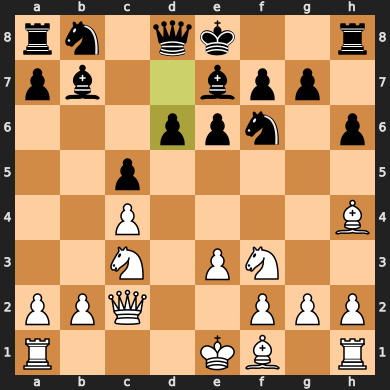

White has played: c2a4
Black has played: b7c6
White has played: a4d1
Black has played: g7g5
White has played: h4g3
Black has played: d8d7


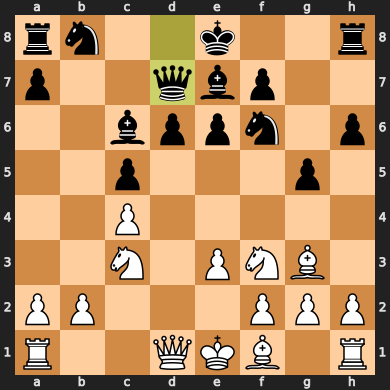

In [30]:
board = chess.Board()
count = 0
reader = chess.polyglot.open_reader("Titans.bin")
while(True):
    move_to_make = opening_move(board, reader)
    if move_to_make is None:
        break
    if board.turn:
        print("White has played: " + move_to_make.uci())
    else:
        print("Black has played: " + move_to_make.uci())
    board.push(move_to_make)

display(board)
while(count < 3):
    root = State(board)
    cpu_move = get_next_move(root, 3)
    board.push(cpu_move)
    print('White' if not board.turn else 'Black',"has played:", cpu_move.uci())
    root = State(board)
    cpu_move = get_next_move(root, 3)
    board.push(cpu_move)
    print('White' if not board.turn else 'Black',"has played:", cpu_move.uci())
    count += 1

display(board)


### Endgame

The endgame phase of chess is extremely important and it decides how the game is going to end. In modern chess, at a certain point, the endgame is in fact solved and it's possible to get the absolute optimal move in a given position using databases called endgame tablebases. The earliest you can use those tablebases is when there are 7 pieces left. The tablebase that we are using is called Syzygy. In our engine, when that condition is reached, it requests the best move from a tablebase server called lila-tablebase, a server for the popular chess website lichess.org, that is based on the Syzygy tablebase. The Syzygy tablebase is extremely large in size (around 16TB) so downloading it locally is an impossible task for us unfortunately. If any error occurs when we request the best move from the server, our engine will first see how many pieces are left. If there are 6 or 7 pieces left, the engine will use our evalutation function. If there are 5 or fewer, the engine will use our local 5 pieces Syzygy tablebase (which is only 1GB) and find the optimal move.

In [31]:
!pip install requests
import requests
import chess.syzygy

def endgame_move(board): #returns the optimal endgame move using syzygy endgame table (7 man board)
    fen_code = board.fen()
    link = "http://tablebase.lichess.ovh/standard?fen=%s" %fen_code
    response = requests.get(link)
    try:
        return chess.Move.from_uci(str(response.json().get('moves')[0].get('uci')))
    except:
        print("Error: ", response.status_code)
        if len(board.piece_map()) > 5:
            best_state = negamax.negamax(root, depth, float('-inf'), float('inf'))[0]
            curr_move = root._board.ply()
            return best_state._board.move_stack[curr_move]  
        else:
            return dtz_minimax(board)



def dtz_minimax(board): #calculates the best move in a 5 man board using syzygy and minimax
    root = negamax.State(board)
    children = negamax.generate_children(root)
    tb = chess.syzygy.open_tablebase("/work/syzygy") 
    root_dtz = tb.probe_dtz(root._board)
    children_dtz = [tb.probe_dtz(child._board) for child in children]
    if tb.probe_dtz(root._board) > 0: 
        best_dtz = float('-inf')
        best_dtz_index = None
        for i in range(len(children_dtz)):
            if children_dtz[i] < 0 and children_dtz[i] > best_dtz:
                best_dtz_index = i
                best_dtz = children_dtz[best_dtz_index]
        best_child = children[best_dtz_index]
        return best_child._board.peek()
    elif tb.probe_dtz(root._board) == 0:
        for i in range(len(children_dtz)):
            if children_dtz[i] == 0:
                return children[i]._board.peek()
    else:
        best_dtz = max(children_dtz)
        best_child = children[children_dtz.index(best_dtz)]
        return best_child._board.peek() 


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Here is a simple endgame position of queen and rook vs knight and bishop that our engine is able to win easily:

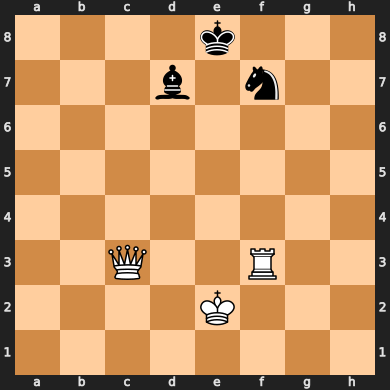

White has played: f3f7
Black has played: e8f7
White has played: c3c5
Black has played: d7g4
White has played: e2d3
Black has played: g4d7
White has played: c5d6
Black has played: d7e6
White has played: d3e4
Black has played: f7f6
White has played: e4f4
Black has played: f6f7
White has played: f4e5
Black has played: e6h3
White has played: d6f6
Black has played: f7g8
White has played: f6g6
Black has played: g8f8
White has played: e5f6
Black has played: h3e6
White has played: g6g7
Black has played: f8e8
White has played: g7e7


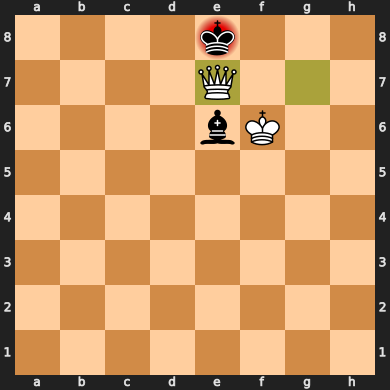

In [32]:
endgame_board = chess.Board()
fen_code = "4k3/3b1n2/8/8/8/2Q2R2/4K3/8 w - - 0 1"
endgame_board.set_fen(fen_code)
display(endgame_board)
while(endgame_board.outcome() is None):
    root = State(endgame_board)
    next_move = get_next_move(root,2)
    endgame_board.push(next_move)
    
    print('White' if not endgame_board.turn else 'Black',"has played:", next_move)

display(endgame_board)

# Conclusion

It has been a lot of fun working on our engine, and we think it's quite decent! However, there are still a LOT of ways to improve it. First of all,  the engine struggles when using depths above 3. It can take up to 6 minutes of calculations of the next move on depth 4! We could improve it by using more pruning techniques to reduce our search space.

Another problem is  the The engine can't explore an infinite amount of moves, it has to have some sort of limitation. Because of that, it has to stop at a certain depth (in our engine, it's 3-4 at the moment). But what if the next move actually worsens the position? The engine won't have any clue about that. This problem is called the horizon effect. A way to counteract this problem is by employing a search technique called quiescence search. This solves this problem by only searching capture moves after reaching the leaf, and making sure that no significant captures can be made to worsen the position dramatically. This makes sure the search stops at "quiet" positions where unexpected moves are unlikely to happen. The search can also be pruned to reduce the search space further. We tried to implement it, but we encountered some problems and decided that it wasn't worth it for the time being.

Furthermore, We would've liked to be more accurate in our evaluation function by considering the mobility of pieces, an integral concept of the game of chess.

We've learned a lot about chess from writing this engine, and realized how complex chess engines truly are. We've gained a new insight on chess, which makes us think chess engines of today are even more impressive than we previously thought.

## Personal reflection

### Shahar

Chess is one of my favorite games, which I have played for a long, long time. Knowing how interesting and integral chess is in the world of data science and artificial intelligence, I had decided to build a chess engine in this course before the semester even started. Ron and I decided to take this course together, since we knew each other for a while and both of us were interested in learning more about the world of data science. After discussing with each other, Ron agreed to join me on this project. 

Researching and programming something I love that interests me, and learning a variety of new things has been very fun and satisfactory. Even though we faced many challenges, such as deciding what and how to cluster our data, something that took us quite a while and a lot of research, or our long debug sessions of the engine, it still felt good and rewarding to complete a project of this size and seeing it working right infront of you - and even playing against it! 

I'm very pleased that I decided to take this course, and that I did it alongside Ron, who has been a great partner with whom I worked for so many hours straight using voice chat. My experience with Dr. Idan Alter has been great - he was of great help and a great communicator. Overall. I definitely think this project got me more interested in the world of data science, and I have no doubt it won't be my last project in this field.

### Ron

During the "chess boom" of the pandemic, I have started to grow an interest in chess. I was also really interested in the worlds of artificial intelligence and data science. Upon learning Shahar was taking the course alongside me, we decided to be partners for this project. Since we had similar interests, it was  a no-brainer to create a chess engine and have our project centered around chess.

The EDA process was a lot of fun. I had learned alot about the game from the observations we made, and was extremely intruiged by our clustering results. As for the chess engine, I was a bit less stoked for it than the EDA because of my inexperience with Python and my general dislike of it. However I did learn some new algorithmic techniques and got more experience in a language that is undoubtedly important in the worlds of AI and data science.

# Useful links

Chess games from 12 top players - https://www.kaggle.com/liury123/chess-game-from-12-top-players?select=game_data.csv

PGN files for top players - http://www.pgnmentor.com/files.html

6 million chess games - https://www.kaggle.com/arevel/chess-games

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ec101756-a613-4800-9f11-98dbf57dca8c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>